In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_parquet("./large_dataset/data.parquet")
data.head()

,text,source,prompt_id,text_length,word_count
0,"Federal law supersedes state law, and cannabis...",Bloom-7B,0,967,157
1,Miles feels restless after working all day. He...,Bloom-7B,0,5068,778
2,So first of I am danish. That means that I fol...,Bloom-7B,0,1602,267
3,In this paper we present a novel rule-based ap...,Bloom-7B,0,5469,848
4,"Most social progressives, love democracy, and ...",Bloom-7B,0,2379,380


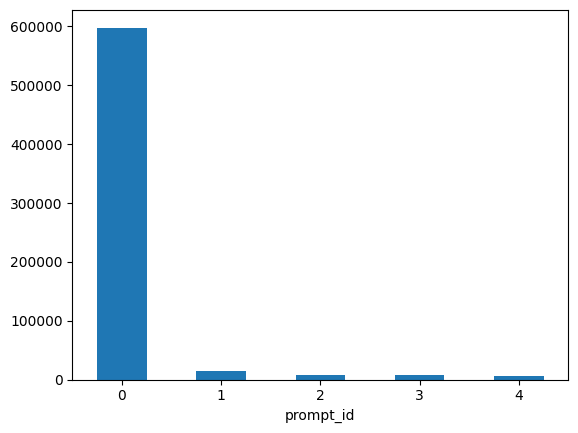

In [3]:
data["prompt_id"].value_counts().sort_values(ascending=False)[:5].plot(
    kind="bar",
)
plt.xticks(rotation=360)
plt.show()

In [4]:
from transformers import (
    DebertaV2Tokenizer,
    DebertaV2ForSequenceClassification,
    Trainer,
    TrainingArguments,
    get_polynomial_decay_schedule_with_warmup,
)

In [5]:
tokenizer = DebertaV2Tokenizer.from_pretrained(
    "microsoft/deberta-v3-base"
)
model = DebertaV2ForSequenceClassification.from_pretrained(
    "microsoft/deberta-v3-base"
)

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'pooler.dense.bias', 'classifier.weight', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
data = data.sample(20000)
sentences_list = data["text"].tolist()

In [7]:
encoded_list = tokenizer.batch_encode_plus(sentences_list, padding=False)
token_counts = [len(tokens) for tokens in encoded_list["input_ids"]]
print("Number of tokens in each sentence in list:", token_counts)

Number of tokens in each sentence in list: [2548, 1585, 104, 1601, 391, 386, 38, 35, 311, 333, 651, 45, 437, 541, 52, 159, 64, 2468, 480, 482, 325, 70, 41, 87, 55, 383, 54, 184, 53, 460, 223, 1325, 229, 984, 188, 333, 720, 676, 1597, 352, 225, 280, 1132, 473, 225, 186, 385, 818, 111, 945, 201, 614, 1834, 1051, 57, 930, 309, 521, 1029, 4660, 461, 43, 141, 100, 1815, 534, 595, 437, 788, 626, 31, 815, 499, 514, 282, 415, 116, 3307, 550, 162, 280, 38, 63, 53, 429, 432, 55, 39, 222, 650, 335, 83, 2079, 343, 116, 138, 275, 589, 69, 59, 329, 78, 44, 91, 139, 4487, 676, 442, 1087, 41, 333, 43, 46, 115, 1866, 1099, 487, 237, 707, 192, 456, 350, 129, 336, 209, 459, 779, 742, 123, 572, 368, 89, 474, 36, 2099, 352, 526, 651, 161, 46, 35, 50, 245, 269, 304, 221, 86, 2335, 837, 564, 3877, 558, 936, 335, 145, 372, 732, 667, 41, 99, 99, 3916, 813, 765, 276, 111, 785, 57, 375, 94, 101, 109, 1030, 908, 454, 39, 77, 730, 167, 65, 654, 997, 362, 265, 241, 369, 852, 658, 197, 548, 59, 206, 122, 663, 185, 2

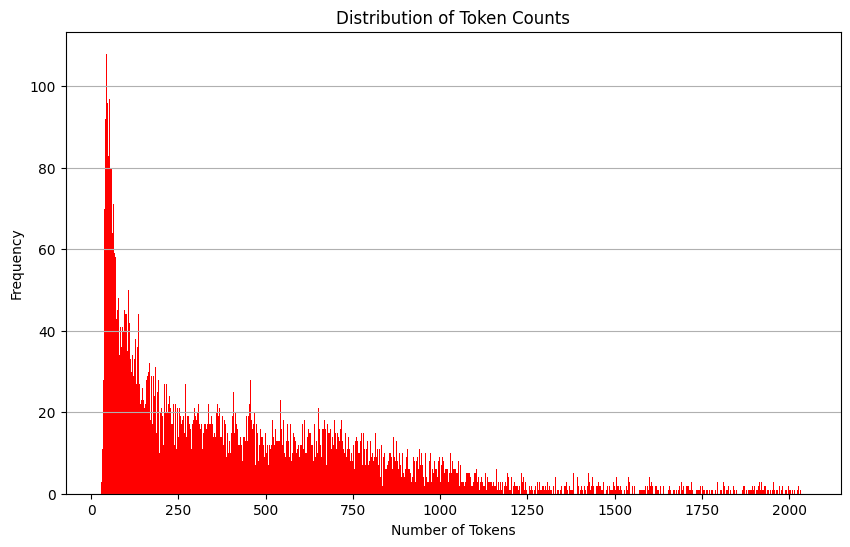

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(token_counts, bins=range(min(token_counts), 2048, 1), alpha=1.0, color="red")
plt.title("Distribution of Token Counts")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=1.0)
plt.show()